* accenture Data Analysis project

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Explore data

In [188]:
df_content = pd.read_csv("Content.csv")
df_content

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
...,...,...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,5b62e10e-3c19-4d28-a57c-e9bdc3d6758d,video,public speaking,NaN
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,4fe420fa-a193-4408-bd5d-62a020233609,GIF,technology,https://socialbuzz.cdn.com/content/storage/7a7...
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,35d6a1f3-e358-4d4b-8074-05f3b7f35c2a,audio,veganism,https://socialbuzz.cdn.com/content/storage/435...
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,b9bcd994-f000-4f6b-87fc-caae08acfaa1,GIF,culture,https://socialbuzz.cdn.com/content/storage/4e4...


In [189]:
# check data type
df_content.dtypes

Unnamed: 0     int64
Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [190]:
# check nan value
df_content.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [191]:
# clean up column name, remove url is empty, remove unamed:0 column
df_content.columns = df_content.columns.str.replace(" ", "_").str.lower()
df_content = df_content[df_content["url"].notna()]
df_content = df_content[["content_id", "type", "category"]]

df_content.isnull().sum()


content_id    0
type          0
category      0
dtype: int64

In [192]:
df_content["type"] = df_content["type"].str.replace(" ", "_").str.lower()
df_content


,content_id,type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
994,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,gif,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,gif,culture


In [193]:
df_content["category"] = df_content["category"].str.replace(" ", "_").str.lower()
df_content = df_content.rename(columns={"type": "content_type"})
df_content.head()

,content_id,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy_eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy_eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


use the same method to clean the data for Reaction.csv and reactionType.csv

In [194]:
df_reactions = pd.read_csv("Reactions.csv")
df_reactions

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
...,...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,80c9ce48-46f9-4f5e-b3ca-3b698fc2e949,dislike,2020-06-27 09:46:48
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,2bd9c167-e06c-47c1-a978-3403d6724606,intrigued,2021-02-16 17:17:02
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,NaN,interested,2020-09-12 03:54:58
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,5ffd8b51-164e-47e2-885e-8b8c46eb63ed,worried,2020-11-04 20:08:31


In [195]:
df_reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [196]:
df_reactions.columns = df_reactions.columns.str.replace(" ", "_").str.lower()
df_reactions = df_reactions[(df_reactions["user_id"].notna()) & (df_reactions["type"].notna())]
df_reactions = df_reactions[["content_id", "type", "datetime"]]

In [197]:
df_reactions.type = df_reactions.type.str.replace(" ", "_").str.lower()
df_reactions.datetime = pd.to_datetime(df_reactions.datetime).dt.date
df_reactions = df_reactions.rename(columns={"datetime": "date", "type": "reactions_type"})
df_reactions.head()

,content_id,reactions_type,date
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23


In [198]:
df_reactiontypes = pd.read_csv("ReactionTypes.csv")
df_reactiontypes.columns = df_reactiontypes.columns.str.lower()
df_reactiontypes = df_reactiontypes[["type", "sentiment", "score"]]
df_reactiontypes = df_reactiontypes.rename(columns={"type": "reactions_type"})
df_reactiontypes.head()

,reactions_type,sentiment,score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


Create a final data set by merging your three tables together
Figure out the Top 5 performing categories

In [199]:
# join 3 tables
join_table = df_reactions.merge(df_content, on="content_id").merge(df_reactiontypes, on="reactions_type")
# groupby category, sort by descending
grouped = join_table.groupby("category")["score"].sum().sort_values(ascending=False)
grouped.head()


category
science           48407
travel            48085
healthy_eating    46445
animals           45918
cooking           42856
Name: score, dtype: int64

In [200]:
# save the join_table and grouped to exel
with pd.ExcelWriter("final.xlsx", engine="openpyxl") as writer:
    #save join_table in sheet1
    join_table["date"] = pd.to_datetime(join_table["date"])
    join_table["date"] = join_table["date"].dt.strftime("%Y-%m-%d")
    join_table.to_excel(writer, sheet_name="join_table", index=False)
    #save the top 5 category
    grouped.head().to_excel(writer, sheet_name="top5")

Exception ignored in: <function ZipFile.__del__ at 0x7ff3392d0430>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


In [201]:
# change to dataframe
grouped = pd.DataFrame(grouped)
grouped

,score
category,
science,48407
travel,48085
healthy_eating,46445
animals,45918
cooking,42856
food,42176
culture,42010
technology,40758
education,39628


In [202]:
# reset index
grouped = grouped.reset_index()
grouped = grouped.rename(columns={"index": "category"})
grouped

,category,score
0,science,48407
1,travel,48085
2,healthy_eating,46445
3,animals,45918
4,cooking,42856
5,food,42176
6,culture,42010
7,technology,40758
8,education,39628
9,tennis,38437


/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


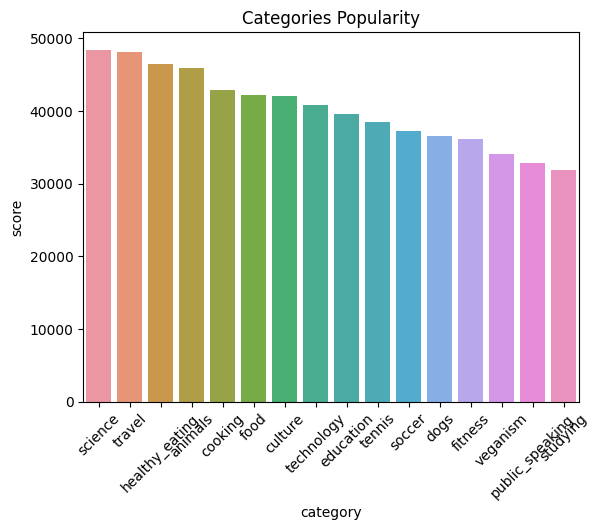

In [203]:
# generate the graph
sns.barplot(data=grouped, x="category", y="score")
plt.xticks(rotation=45)
plt.title("Categories Popularity")
plt.show()

In [204]:
#unique categories
grouped.category.unique()

array(['science', 'travel', 'healthy_eating', 'animals', 'cooking',
       'food', 'culture', 'technology', 'education', 'tennis', 'soccer',
       'dogs', 'fitness', 'veganism', 'public_speaking', 'studying'],
      dtype=object)

In [205]:
# How many unique categories are there?
grouped.category.count()

16

In [206]:
list(grouped.head()["category"])

['science', 'travel', 'healthy_eating', 'animals', 'cooking']

In [207]:
# How many reactions are there to the most popular category?
grouped_reactions = join_table.groupby("category")["content_id"].count().sort_values(ascending=False)
grouped_reactions = pd.DataFrame(grouped_reactions)
grouped_reactions = grouped_reactions.reset_index()
grouped_reactions = grouped_reactions.rename(columns={"index": "category"})
grouped_reactions_top5 = grouped_reactions[(grouped_reactions.category == "science") | (grouped_reactions.category == "travel") | (grouped_reactions.category == "healthy_eating") | (grouped_reactions.category == "animals") | (grouped_reactions.category == "cooking")]
grouped_reactions_top5

,category,content_id
0,travel,1290
1,science,1281
2,animals,1236
3,healthy_eating,1219
4,cooking,1186


/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


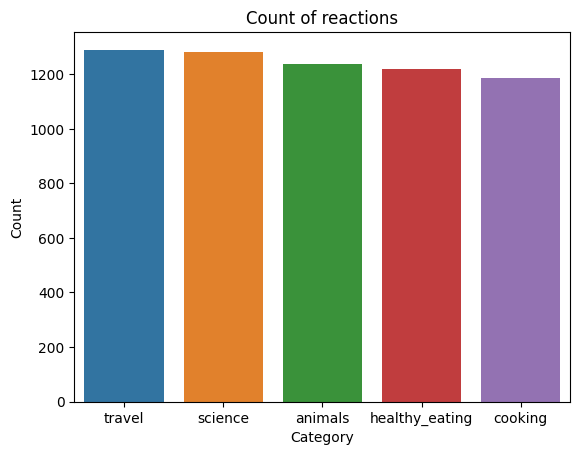

In [208]:
# plot the top5 count
sns.barplot(data=grouped_reactions_top5, x="category", y="content_id")
plt.title("Count of reactions")
plt.ylabel("Count")
plt.xlabel("Category")
plt.show()

In [209]:
# What was the month with the most posts?
join_table["date"] = pd.to_datetime(join_table["date"])
grouped_posts = join_table.groupby(join_table["date"].dt.month)["content_id"].count().sort_values(ascending=False)
grouped_posts

date
8     1518
5     1494
12    1480
1     1472
10    1454
7     1442
11    1431
3     1411
4     1397
9     1395
6     1383
2     1340
Name: content_id, dtype: int64

In [214]:
grouped_posts = pd.DataFrame(grouped_posts)
grouped_posts

,date,content_id
0,8,1518
1,5,1494
2,12,1480
3,1,1472
4,10,1454
5,7,1442
6,11,1431
7,3,1411
8,4,1397
9,9,1395


/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

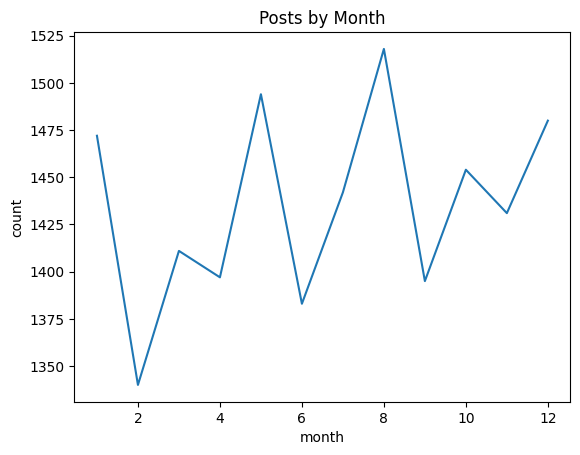

In [215]:
# plot the graph
sns.lineplot(data=grouped_posts, x="date", y="content_id")
plt.xlabel("month")
plt.ylabel("count")
plt.title("Posts by Month")
plt.show()